# Install

In [1]:
url = 'https://anaconda.org/rdkit/rdkit/2018.09.1.0/download/linux-64/rdkit-2018.09.1.0-py36h71b666b_1.tar.bz2'
!curl -L $url | tar xj lib
!mv lib/python3.6/site-packages/rdkit /usr/local/lib/python3.6/dist-packages/
x86 = '/usr/lib/x86_64-linux-gnu'
!mv lib/*.so.* $x86/
!ln -s $x86/libboost_python3-py36.so.1.65.1 $x86/libboost_python3.so.1.65.1
import sys
sys.path.append('/usr/local/lib/python3.6/dist-packages/')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4091    0  4091    0     0   7592      0 --:--:-- --:--:-- --:--:--  7604
100 20.2M  100 20.2M    0     0  1369k      0  0:00:15  0:00:15 --:--:-- 1936k
mv: cannot move 'lib/python3.6/site-packages/rdkit' to '/usr/local/lib/python3.6/dist-packages/': No such file or directory


In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 14.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MAIN

In [4]:
## Código feito por CHARLES A.S.

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
import numpy as np
import pandas as pd

def get_matrix(smiles_file):
  with open(smiles_file) as in_file:

    matrix = []
    names = []
    for line in in_file:
      if '\t' in line:
        smiles = line.split('\t')[0].strip()
        name = line.split('\t')[1].strip()
      else:
        smiles = line.split(' ')[0].strip()
        name = line.split(' ')[1].strip()

      molecule = Chem.MolFromSmiles(smiles)
      if molecule is None:
        continue

      # Topological Fingerprints 2048 bits
      fp1 = Chem.RDKFingerprint(molecule)
      # MACCS Keys 167 bits
      fp2 = MACCSkeys.GenMACCSKeys(molecule)
      # Concatena fingerprints
      fp_final = list(fp1.ToBitString() + fp2.ToBitString())
      # tranforma em uma lista de inteiros
      matrix.append([int(x) for x in fp_final])
      names.append(name)

    df = pd.DataFrame(matrix, index=names)
    df.index.name = "name"
    return df

# José

In [11]:
# Diretorio com arquivos ligantes e decoys
meu_drive = "/content/drive/MyDrive/smiles/BACES/"

# Definindo caminho dos arquivos
ligand_smiles = meu_drive + "ligands_serine_protease.smi"
decoy_smiles  = meu_drive + "decoys_serine_protease.smi"

In [12]:
# Gerando matriz para ligantes
ligands_df = get_matrix(ligand_smiles)
#ligands_df['class'] = 1

ligands_df

ligands_df.to_csv(meu_drive + 'ligands_matrix.csv')

Calculando a matriz de similaridade de Tanimoto...
Média da Similaridade (Tanimoto): 0.3520
Mediana da Similaridade (Tanimoto): 0.3441
Desvio Padrão da Similaridade: 0.1303


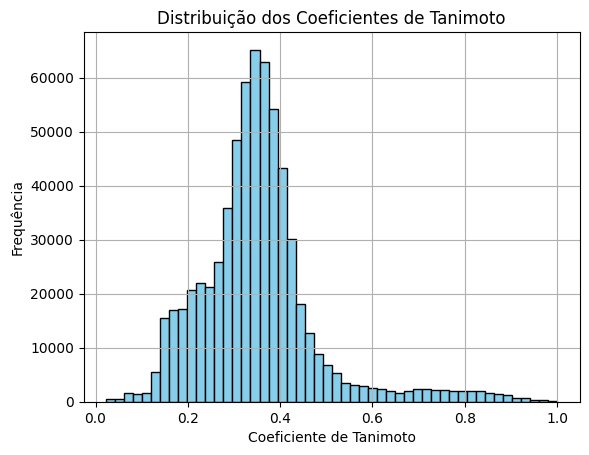

In [8]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o coeficiente de Tanimoto
def tanimoto_coefficient(u, v):
    intersection = np.dot(u, v)
    union = np.sum(u) + np.sum(v) - intersection
    return intersection / union

# Função para calcular a diversidade e exibir métricas
def analyze_diversity(dataframe):
    # Convertendo DataFrame para matriz numpy
    fingerprints = dataframe.values

    # Calculando a matriz de similaridade de Tanimoto
    print("Calculando a matriz de similaridade de Tanimoto...")
    tanimoto_matrix = squareform(pdist(fingerprints, metric=tanimoto_coefficient))

    # Extraindo os valores únicos (acima da diagonal principal)
    tanimoto_values = tanimoto_matrix[np.triu_indices(len(fingerprints), k=1)]

    # Estatísticas descritivas
    mean_similarity = np.mean(tanimoto_values)
    median_similarity = np.median(tanimoto_values)
    std_similarity = np.std(tanimoto_values)

    print(f"Média da Similaridade (Tanimoto): {mean_similarity:.4f}")
    print(f"Mediana da Similaridade (Tanimoto): {median_similarity:.4f}")
    print(f"Desvio Padrão da Similaridade: {std_similarity:.4f}")

    # Histograma dos valores de similaridade
    plt.hist(tanimoto_values, bins=50, edgecolor='k', color='skyblue')
    plt.title('Distribuição dos Coeficientes de Tanimoto')
    plt.xlabel('Coeficiente de Tanimoto')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Chame a função passando o DataFrame gerado
analyze_diversity(ligands_df)


In [9]:
# Gerando matriz para decoys
decoys_df = get_matrix(decoy_smiles)
#decoys_df['class'] = 0

decoys_df

,0,1,2,3,4,5,6,7,8,9,...,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214
name,,,,,,,,,,,,,,,,,,,,,
XNPC,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,0
EMIA,1,1,1,1,1,1,0,1,1,0,...,0,1,0,1,1,1,0,1,1,0
WERA,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,1,1,0
AJBE,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,1,1,1,1,0
REOZ,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAOU,1,1,1,0,0,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
BHST,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
QYTU,1,1,0,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,0


Calculando a matriz de similaridade de Tanimoto...
Média da Similaridade (Tanimoto): 0.3445
Mediana da Similaridade (Tanimoto): 0.3477
Desvio Padrão da Similaridade: 0.0835


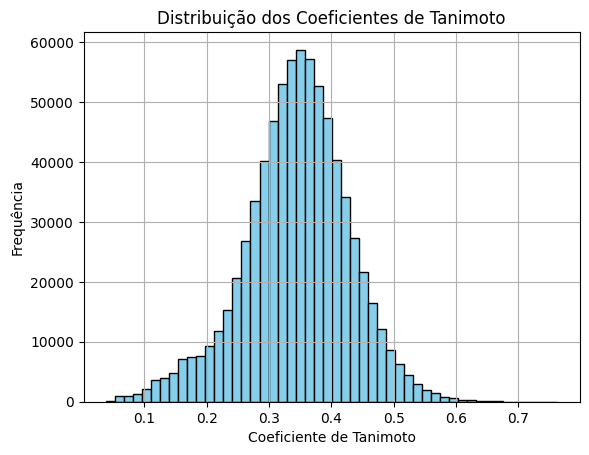

In [10]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o coeficiente de Tanimoto
def tanimoto_coefficient(u, v):
    intersection = np.dot(u, v)
    union = np.sum(u) + np.sum(v) - intersection
    return intersection / union

# Função para calcular a diversidade e exibir métricas
def analyze_diversity(dataframe):
    # Convertendo DataFrame para matriz numpy
    fingerprints = dataframe.values

    # Calculando a matriz de similaridade de Tanimoto
    print("Calculando a matriz de similaridade de Tanimoto...")
    tanimoto_matrix = squareform(pdist(fingerprints, metric=tanimoto_coefficient))

    # Extraindo os valores únicos (acima da diagonal principal)
    tanimoto_values = tanimoto_matrix[np.triu_indices(len(fingerprints), k=1)]

    # Estatísticas descritivas
    mean_similarity = np.mean(tanimoto_values)
    median_similarity = np.median(tanimoto_values)
    std_similarity = np.std(tanimoto_values)

    print(f"Média da Similaridade (Tanimoto): {mean_similarity:.4f}")
    print(f"Mediana da Similaridade (Tanimoto): {median_similarity:.4f}")
    print(f"Desvio Padrão da Similaridade: {std_similarity:.4f}")

    # Histograma dos valores de similaridade
    plt.hist(tanimoto_values, bins=50, edgecolor='k', color='skyblue')
    plt.title('Distribuição dos Coeficientes de Tanimoto')
    plt.xlabel('Coeficiente de Tanimoto')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Chame a função passando o DataFrame gerado
analyze_diversity(decoys_df)


In [ ]:
# Concatenando matrizes
matrix = pd.concat([ligands_df, decoys_df])

In [ ]:
# Salvando matriz no Drive
matrix.to_csv(meu_drive + 'train_set.csv')

matrix

,0,1,2,3,4,5,6,7,8,9,...,2206,2207,2208,2209,2210,2211,2212,2213,2214,class
name,,,,,,,,,,,,,,,,,,,,,
BCRO,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,1,1,1,0,1
BUWX,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,1,1,1,0,1
GXUG,1,1,0,0,1,1,0,0,0,0,...,1,1,0,1,1,1,1,1,0,1
SZQK,1,1,1,0,0,1,0,0,1,0,...,1,1,0,1,1,1,1,1,0,1
SBXJ,1,1,1,1,1,1,0,0,1,0,...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAOU,1,1,1,0,0,1,0,0,1,1,...,1,1,1,1,1,1,1,1,0,0
BHST,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
QYTU,1,1,0,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,0,0
